In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Interpolation:
    def bilinear(self, img, scale=1.5):
        H, W = img.shape[:2]
        ch = 1 if len(img.shape) < 3 else img.shape[2]
        H_big, W_big = int(H * scale), int(W * scale)
        output_img = np.zeros((H_big, W_big, ch))

        for i in range(H_big):
            for j in range(W_big):
                y, x = min(H-2, int(i/scale)), min(W-2, int(j/scale))
                dy, dx = i/scale - y, j/scale - x
                D = [(1-dy)*(1-dx), dy*(1-dx), (1-dy)*dx, dy*dx]
                if len(img.shape) == 3:
                    I = [img[y, x, :], img[y+1, x, :], img[y, x+1, :], img[y+1, x+1, :]]
                    output_img[i, j, :] = sum(d*z for (d, z) in zip(D, I))
                else:
                    I = [img[y, x], img[y+1, x], img[y, x+1], img[y+1, x+1]]
                    output_img[i, j] = sum(d*z for (d, z) in zip(D, I))

        # 仮に幅や高さが 1 になるような画像であると成立しないので注意
        output_img = np.squeeze(np.clip(output_img, 0, 255).astype("uint8"))
        return output_img

In [10]:
class Solver:
    def problem_73(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ip = Interpolation()
        output_img = ip.bilinear(img_gray, 0.5)
        output_img = ip.bilinear(output_img, 2.0)
        return output_img
    
    def problem_74(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.int32)
        img_ip = self.problem_73(img).astype(np.int32)
        img_diff = np.abs(img_gray - img_ip)
        img_diff = (img_diff / img_diff.max() * 255).astype(np.uint8)
        return img_diff

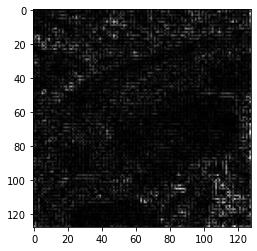

In [11]:
input_img = cv2.imread("../imori.jpg")
solver = Solver()
output_img = solver.problem_74(input_img)
plt.imshow(output_img, cmap="gray")
plt.show()